In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/ravis/Downloads/sentiment_analysis_data.csv")
df.shape

(5842, 2)

In [4]:
X = df['Sentence']
X.head()

0    The GeoSolutions technology will leverage Bene...
1    $ESI on lows, down $1.50 to $2.50 BK a real po...
2    For the last quarter of 2010 , Componenta 's n...
3    According to the Finnish-Russian Chamber of Co...
4    The Swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [5]:
y = df['Sentiment']
y.head()

0    positive
1    negative
2    positive
3     neutral
4     neutral
Name: Sentiment, dtype: object

In [6]:
y.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [7]:
cols = list(df.columns)
cols

['Sentence', 'Sentiment']

In [8]:
from sklearn.preprocessing import LabelEncoder
y = pd.DataFrame(LabelEncoder().fit_transform(y) , columns = [cols[1]])
type(y)

pandas.core.frame.DataFrame

In [9]:
y.head()

,Sentiment
0,2
1,0
2,2
3,1
4,1


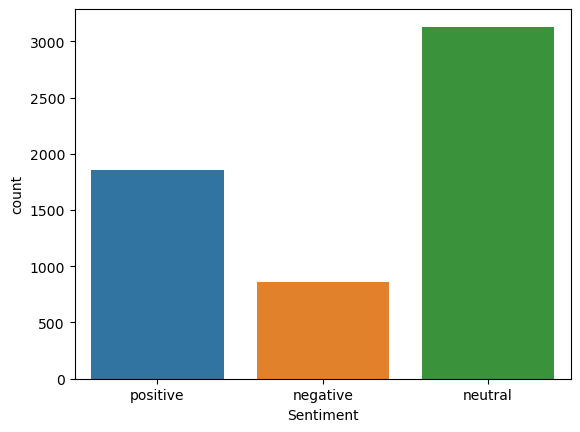

In [10]:
import seaborn as sns
sns.countplot(x ='Sentiment', data = df)
plt.show()

In [11]:
df.add(' ')
positive = df.loc[df['Sentiment'] == 'positive'].Sentence
negative = df.loc[df['Sentiment'] == 'negative'].Sentence
neutral = df.loc[df['Sentiment'] == 'neutral'].Sentence

In [12]:
positive.head()

0     The GeoSolutions technology will leverage Bene...
2     For the last quarter of 2010 , Componenta 's n...
5       $SPY wouldn't be surprised to see a green close
8     Kone 's net sales rose by some 14 % year-on-ye...
10    Circulation revenue has increased by 5 % in Fi...
Name: Sentence, dtype: object

In [13]:
negative.head()

1     $ESI on lows, down $1.50 to $2.50 BK a real po...
6     Shell's $70 Billion BG Deal Meets Shareholder ...
7     SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
11    $SAP Q1 disappoints as #software licenses down...
39    $AAPL afternoon selloff as usual will be bruta...
Name: Sentence, dtype: object

In [14]:
neutral.head()

3     According to the Finnish-Russian Chamber of Co...
4     The Swedish buyout firm has sold its remaining...
9     The Stockmann department store will have a tot...
13             Viking Line has canceled some services .
14    Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...
Name: Sentence, dtype: object

In [15]:
pstv_string = positive.sum()
ngtv_string = negative.sum()
ntrl_string = neutral.sum()

In [16]:
pstv_string

'The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .$SPY wouldn\'t be surprised to see a green closeKone \'s net sales rose by some 14 % year-on-year in the first nine months of 2008 .Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .The subdivision made sales revenues last year of EUR 480.7 million EUR 414.9 million in 2008 , and operating profits of EUR 44.5 million EUR 7.4 million .$FB gone green on day$MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30% http://stks.co/ir2FAviva, Friends Life top forecasts ahead of 5.6 billion pound mergerShire CEO steps up dri

In [17]:
!pip install wordcloud 
from wordcloud import WordCloud

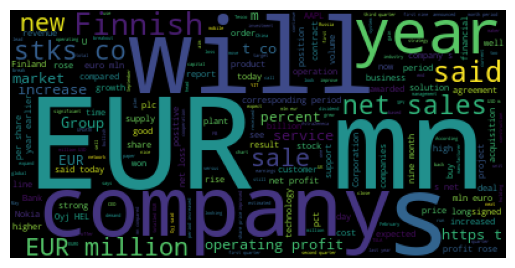

In [18]:
wordcloud = WordCloud().generate(pstv_string)
#wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

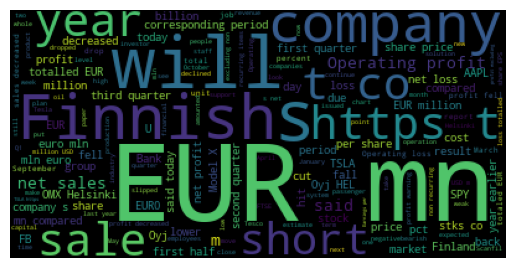

In [19]:
wordcloud = WordCloud().generate(ngtv_string)
#wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

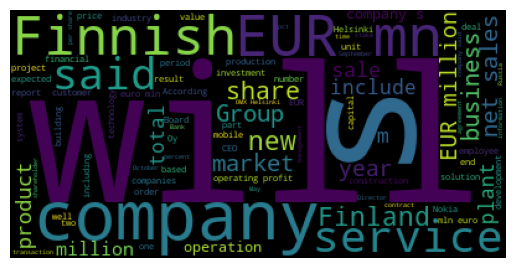

In [20]:
wordcloud = WordCloud().generate(ntrl_string)
#wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents = 'ascii')
X_train_counts = count_vect.fit_transform(X)

In [22]:
X_train_counts

<5842x11379 sparse matrix of type '<class 'numpy.int64'>'
	with 97177 stored elements in Compressed Sparse Row format>

In [23]:
count_df = pd.DataFrame(X_train_counts.todense(), columns=count_vect.get_feature_names_out())
count_df.head()

,00,000,000063,002,0025,003,0030,007,008,01,...,znga,zoltan,zone,zoo,zs,zsl,zte,zu,zurich,zwhthsvfsf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
count_df.shape

(5842, 11379)

In [25]:
count_vect.get_feature_names_out()

array(['00', '000', '000063', ..., 'zu', 'zurich', 'zwhthsvfsf'],
      dtype=object)

In [26]:
count_vect.vocabulary_['netflix']

7039

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(count_df , y , test_size = 0.25 , random_state = 5)

In [28]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4381, 11379) (1461, 11379) (4381, 1) (1461, 1)


In [29]:
y_test.value_counts()

Sentiment
1            771
2            472
0            218
dtype: int64

In [30]:
from sklearn.naive_bayes import MultinomialNB
y_pred = MultinomialNB().fit(X_train , y_train).predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_pred , y_test)

-0.17824646294640512

In [32]:
MultinomialNB().fit(X_train , y_train).score(X_train , y_train)

0.8447842958228715

In [33]:
MultinomialNB().fit(X_train , y_train).score(X_test,y_test)

0.702943189596167

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 81,  88,  49],
       [ 71, 641,  59],
       [ 21, 146, 305]], dtype=int64)